### 특징 

+ Keras와 즉시 실행(eager execution)을 이용한 쉬운 모델 작성 
+ 어떤 플랫폼에서든 튼튼한(robust) 모델을 배포 (튼튼하다는 것은 안정성을 의미한다)
+ 연구를 위한 강력한 실험법 
+ deprecated된 API를 정리하고 중복을 줄여서 API를 단순화 


### API 

+ tf.data
+ tf.keras



In [1]:
#!pip install tensorflow

ERROR: Could not install packages due to an EnvironmentError: [WinError 5] 액세스가 거부되었습니다: 'C:\\Users\\Master\\anaconda3\\Lib\\site-packages\\~umpy\\core\\_multiarray_tests.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



  Using cached absl_py-0.11.0-py3-none-any.whl (127 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached Markdown-3.3.3-py3-none-any.whl (96 kB)
  Created wheel for wrapt: filename=wrapt-1.12.1-py3-none-any.whl size=19558 sha256=430c7165ad5301a9f9c4beace8d5ec72d2b54a242193ac1c95a737574ce659d0
  Stored in directory: c:\users\master\appdata\local\pip\cache\wheels\5f\fd\9e\b6cf5890494cb8ef0b5eaff72e5d55a70fb56316007d6dfe73
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=ee9fdf4d65574699c072c0bb63afde9b4704a17e0ce0396daee26757de641fcb
  Stored in directory: c:\users\master\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built wrapt termcolor
  Attempting uninstall: wrapt
    Found existing installa

In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)
print(tf.keras.__version__)

2.4.1
2.4.0


In [8]:
a = tf.constant(10)
print(a) # 실제로 공간이만들어지고 저장되어있다 -> Session을 자동으로 만들어서 따로 만들 필요가 없다.
print(a+5) 
#값만 꺼내서 쓸 때
print(a.numpy())

tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(15, shape=(), dtype=int32)
10


In [15]:
b = tf.constant("hello world")
print(b) # b'hello world'에 b는 byte의 약자 -> 알파벳은 하나당 1바이트
print(b.numpy())
print(type(b))  # EagerTensor ; 좀 더 깊이 실행할 수 있는 타입
print(type(b.numpy()))

tf.Tensor(b'hello world', shape=(), dtype=string)
b'hello world'
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'bytes'>


In [18]:
c = tf.constant("안녕하세요")
print(c) # 2바이트를 1바이트로 쪼갬
# 2바이트로 표시
print(c.numpy().decode("utf-8"))

tf.Tensor(b'\xec\x95\x88\xeb\x85\x95\xed\x95\x98\xec\x84\xb8\xec\x9a\x94', shape=(), dtype=string)
안녕하세요


### 선형 회귀 모델

In [ ]:
# 데이터 준비 
x_train = [1, 2, 3]
y_train = [1, 2, 3]

# 왜 Variable를 사용해야 하는 가
W = tf.Variable(tf.random_normal([1]), dtype = tf.float32, name="Weight") #name은 생략가능
b = tf.Variable(tf.random_normal([1]), dtype = tf.float32, name="bias")

# 가설 준비
hypot = W * x_train + b

# 비용 함수 (MSE 평균 제곱 오차)
cost = tf.reduce_mean(tf.square(hypot - y_train))

# 최저 비용 학습을 위한 경사 하강 알고리즘(Gradient Descent)
gradient = tf.reduce_mean((hypot - y_train) * x_train)
learning_rate = 0.1
descent = W - (learning_rate * gradient) #  learning_rate은 하이퍼 파라미터
update = W.assign(descent) # 텐서 플로우에서는 W = descent 직접적으로 넣을 수 없고 assign으로 간접적으로 넣어줘야한다.

########## Graph 작업 완료 ##################

sess = tf.Session()
sess.run(tf.global_variables_initializer())
#얼만큼 학습시킬 것인지
for step in range(21):
    _, weight, c=sess.run([update, W, cost])
    print(step, weight, c)
    
    
sess.close()

In [201]:
x_train = [1, 2, 3]
y_train = [1, 2, 3]

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(1, input_dim=1))
sgd = tf.keras.optimizers.SGD(lr=0.01)
model. compile(loss="mse", optimizer=sgd)
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
1/1 [==============================] - 0s 249ms/step - loss: 33.2334
Epoch 2/20
1/1 [==============================] - 0s 52ms/step - loss: 26.2976
Epoch 3/20
1/1 [==============================] - 0s 57ms/step - loss: 20.8151
Epoch 4/20
1/1 [==============================] - 0s 58ms/step - loss: 16.4814
Epoch 5/20
1/1 [==============================] - 0s 51ms/step - loss: 13.0557
Epoch 6/20
1/1 [==============================] - 0s 43ms/step - loss: 10.3477
Epoch 7/20
1/1 [==============================] - 0s 51ms/step - loss: 8.2070
Epoch 8/20
1/1 [==============================] - 0s 49ms/step - loss: 6.5148
Epoch 9/20
1/1 [==============================] - 0s 58ms/step - loss: 5.1771
Epoch 10/20
1/1 [==============================] - 0s 54ms/step - loss: 4.1196
Epoch 11/20
1/1 [==============================] - 0s 48ms/step - loss: 3.2835
Epoch 12/20
1/1 [==============================] - 0s 56ms/step - loss: 2.6225
Epoch 13/20
1/1 [==============================] - 0s 

In [202]:
y_train

[1, 2, 3]

In [34]:
print(model.weights)
print(model.weights[0].numpy() * x_train[0] + model.weights[1].numpy())
print(model.weights[0].numpy() * x_train[1] + model.weights[1].numpy())
print(model.weights[0].numpy() * x_train[2] + model.weights[1].numpy())

[<tf.Variable 'dense_6/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.8846853]], dtype=float32)>, <tf.Variable 'dense_6/bias:0' shape=(1,) dtype=float32, numpy=array([0.15560436], dtype=float32)>]
[[1.0402896]]
[[1.9249749]]
[[2.8096602]]


### Fasion MNIST Dataset

In [20]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from tensorflow import keras
from tensorflow.keras import models, layers, optimizers


In [398]:
mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [399]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train[0:10])

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
[9 0 0 3 0 2 7 2 5 5]


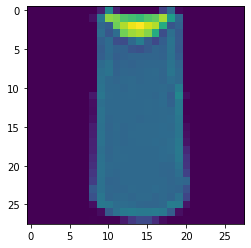

In [400]:
plt.imshow(X_train[2])

In [401]:
class_names=["T-shirt/top", "Trouser", "Pullover","Dress","Coat","Sandal",
             "Shirt","Sneaker","bag","Ankle boot"]

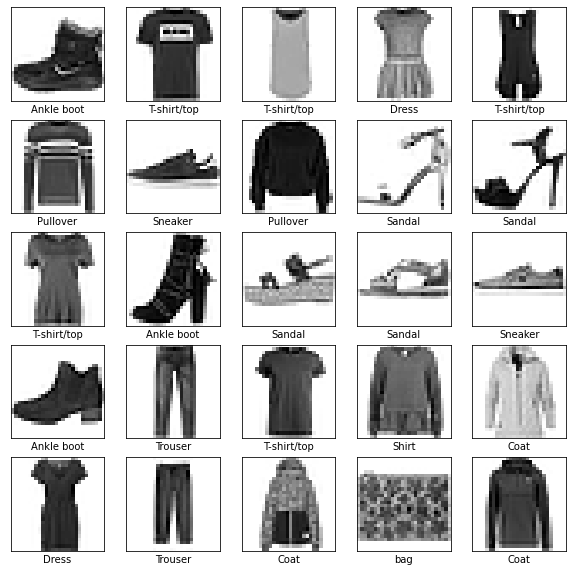

In [402]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap =plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])

##### 2. 모델 구축 및 훈련 

In [4]:
from tensorflow.keras.utils import to_categorical
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
print(y_train[0:10])

NameError: name 'y_train' is not defined

In [5]:
def make_model(input_num, output_num, hidden_layer):
    model = models.Sequential()
    model.add(layers.Dense(hidden_layer[0], input_shape = (input_num,), activation="relu", name = "hidden-1"))
    model.add(layers.Dense(hidden_layer[1], activation="relu", name = "hidden-2"))
    model.add(layers.Dense(hidden_layer[2], activation="relu", name = "hidden-3"))
    model.add(layers.Dense(hidden_layer[3], activation="relu", name = "hidden-4"))
    
    model.add(keras.layers.Dropout(0.2))
    
    adam = tf.keras.optimizers.Adam(lr=0.001)
    #sgd = tf.keras.optimizers.SGD(lr=0.01)
    model.add(layers.Dense(64, input_shape=(input_num,), activation = "relu"))
    model.add(layers.Dense(64, activation = "relu"))
    model.add(layers.Dense(64, activation = "relu"))
    model.add(layers.Dense(output_num, activation= "softmax"))
    model.compile(loss="categorical_crossentropy", optimizer=adam, metrics = ["accuracy"])
    return model

In [152]:
X_train = X_train.reshape(-1, 28*28).astype("float32") / 255 
X_test = X_test.reshape(-1, 28*28).astype("float32") / 255 

x_val = X_train[:12600] # 테스트용
X_train = X_train[12600 :]
y_val = y_train[:12600]
y_train = y_train[12600:]

input_num = 784
output_num = 10
hidden_layer = [255, 255, 255, 255]

model = make_model(input_num, output_num, hidden_layer)
model.fit(X_train, y_train, epochs=30, batch_size= 32, validation_data = (x_val, y_val))
# loss: 0.1859 - accuracy: 0.9310 - val_loss: 0.3430 - val_accuracy: 0.8883 / SGD - lr=0.01 CL4 / FC4
# loss: 0.1645 - accuracy: 0.9406 - val_loss: 0.3787 - val_accuracy: 0.8975 / adam - lr = 0.001 cl4/ fc4

Epoch 1/30
1482/1482 [==============================] - 4s 2ms/step - loss: 0.7585 - accuracy: 0.7198 - val_loss: 0.4447 - val_accuracy: 0.8407
Epoch 2/30
1482/1482 [==============================] - 3s 2ms/step - loss: 0.4224 - accuracy: 0.8485 - val_loss: 0.3894 - val_accuracy: 0.8630
Epoch 3/30
1482/1482 [==============================] - 3s 2ms/step - loss: 0.3777 - accuracy: 0.8648 - val_loss: 0.3630 - val_accuracy: 0.8668
Epoch 4/30
1482/1482 [==============================] - 3s 2ms/step - loss: 0.3510 - accuracy: 0.8712 - val_loss: 0.3802 - val_accuracy: 0.8655
Epoch 5/30
1482/1482 [==============================] - 3s 2ms/step - loss: 0.3356 - accuracy: 0.8790 - val_loss: 0.3829 - val_accuracy: 0.8674
Epoch 6/30
1482/1482 [==============================] - 3s 2ms/step - loss: 0.3154 - accuracy: 0.8867 - val_loss: 0.3534 - val_accuracy: 0.8744
Epoch 7/30
1482/1482 [==============================] - 3s 2ms/step - loss: 0.3059 - accuracy: 0.8880 - val_loss: 0.3272 - val_accuracy:

In [153]:
result = model.evaluate(X_test, y_test, batch_size = 32)
print(result) 
# [0.38227522373199463, 0.8798999786376953] / SGD - lr=0.01 CL4 / FC4
# [0.4312649965286255, 0.8942999839782715] / adam - lr = 0.001 cl4/ fc4

313/313 [==============================] - 0s 752us/step - loss: 0.4313 - accuracy: 0.8943
[0.4312649965286255, 0.8942999839782715]


In [109]:
xhat_idx = np.random.choice(X_test.shape[0], 10)
print(xhat_idx)

y_test[xhat_idx]

[7930 1877 3321 4452 8470 8290 3756  843 4529 5712]


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [110]:
yhat = model.predict_classes(X_test[xhat_idx])
for i in range(10):
    print("True :", np.argmax(y_test[xhat_idx[i]]), ", Predict : ", yhat[i])

True : 7 , Predict :  9
True : 1 , Predict :  1
True : 1 , Predict :  1
True : 1 , Predict :  1
True : 4 , Predict :  6
True : 2 , Predict :  2
True : 6 , Predict :  6
True : 1 , Predict :  1
True : 5 , Predict :  5
True : 8 , Predict :  8


C:\Users\Master\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [30]:
mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train[0:10])

class_names=["T-shirt/top", "Trouser", "Pullover","Dress","Coat","Sandal",
             "Shirt","Sneaker","bag","Ankle boot"]

#from tensorflow.keras.utils import to_categorical
#y_train = keras.utils.to_categorical(y_train)
#y_test = keras.utils.to_categorical(y_test)
#print(y_train[0:10])

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
[9 0 0 3 0 2 7 2 5 5]


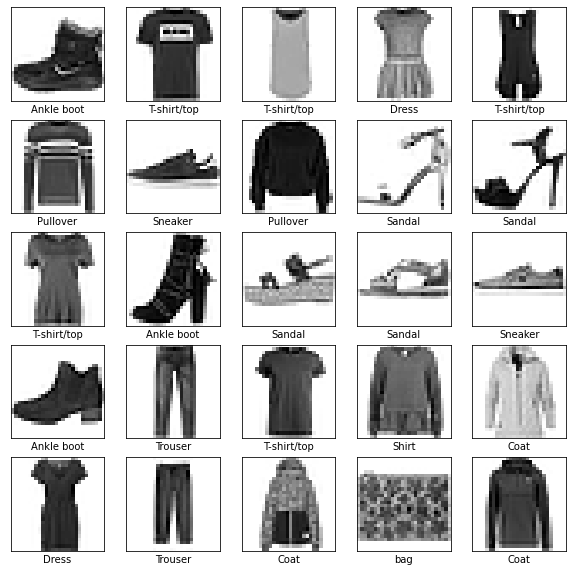

In [31]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap =plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])

In [152]:
def make_model(input_num, output_num, hidden_layer):
    model = models.Sequential()
    model.add(layers.Dense(hidden_layer[0], input_shape = (input_num,), activation="relu", name = "hidden-1"))
    model.add(layers.Dense(hidden_layer[1], activation="relu", name = "hidden-2"))
    model.add(layers.Dense(hidden_layer[2], activation="relu", name = "hidden-3"))
    model.add(layers.Dense(hidden_layer[3], activation="relu", name = "hidden-4"))
    
   # model.add(keras.layers.Dropout(0.2))
    
    
    #adam = tf.keras.optimizers.Adam(lr=0.001)
    sgd = tf.keras.optimizers.SGD(lr=0.01)
    #Adadelta = tf.keras.optimizers.Adadelta(lr=0.01)
    model.add(layers.Flatten(input_shape=(28,28)))
    model.add(layers.Dense(64, activation = "relu"))
    model.add(layers.Dense(64, activation = "relu"))
    model.add(layers.Dense(64, activation = "relu"))  
    model.add(layers.Dense(64, activation = "relu"))
    model.add(layers.Dense(output_num, activation= "softmax"))
    
    model.compile(loss="sparse_categorical_crossentropy", optimizer=sgd, metrics = ["accuracy"])
    #model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics = ["accuracy"])
    return model

In [153]:
mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train[0:10])

class_names=["T-shirt/top", "Trouser", "Pullover","Dress","Coat","Sandal",
             "Shirt","Sneaker","bag","Ankle boot"]

X_train = X_train.reshape(-1, 28*28).astype("float32") / 255 
X_test = X_test.reshape(-1, 28*28).astype("float32") / 255 



input_num = 784
output_num = 10
hidden_layer = [255, 255, 255, 255]


model = make_model(input_num, output_num, hidden_layer)
model.fit(X_train, y_train, epochs=10, batch_size= 32)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
[9 0 0 3 0 2 7 2 5 5]
Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.4594 - accuracy: 0.4772
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5159 - accuracy: 0.8160
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4344 - accuracy: 0.8458
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3839 - accuracy: 0.8606
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3578 - accuracy: 0.8695
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3337 - accuracy: 0.8777
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3187 - accuracy: 0.8819
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3017 - accuracy: 0.8869
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2909 - accuracy: 0.8918
Epoch 10/1

In [154]:
result = model.evaluate(X_test, y_test)
print(result) 

313/313 [==============================] - 0s 792us/step - loss: 0.3617 - accuracy: 0.8669
[0.36171695590019226, 0.8669000267982483]


In [155]:
pred = model.predict(X_test)
pred[0]
print(np.argmax([pred[0]]))
print(y_test[0])

9
9


In [156]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 
                                         100*np.max(predictions_array), 
                                         class_names[true_label]), color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

TypeError: Invalid shape (784,) for image data

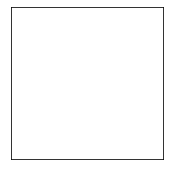

In [157]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1, 2, 1)
plot_image(i, pred, y_test, X_test)
plt.subplot(1, 2, 2)
plot_value_array(i, pred, y_test)

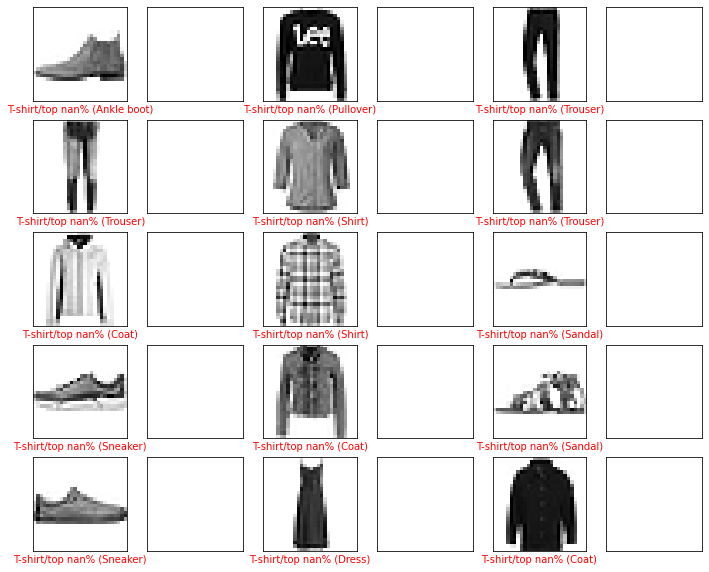

In [140]:
num_rows= 5
num_cols =3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, pred, y_test, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, pred, y_test)

(28, 28)
(1, 28, 28)
[[nan nan nan nan nan nan nan nan nan nan]]


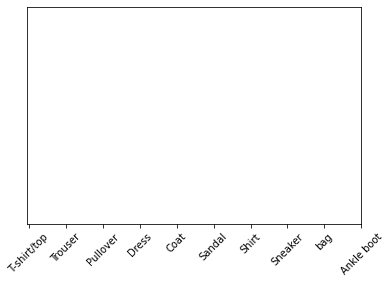

In [145]:
img = X_test[1234]
print(img.shape)
img = (np.expand_dims(img,0))
#img = (np.reshape(img, (1, 28, 28)))
print(img.shape)
pred_single = model.predict(img)
print(pred_single)
plot_value_array(0, pred_single, y_test)
_ = plt.xticks(range(10),class_names, rotation=45)

In [40]:
xhat_idx = np.random.choice(X_test.shape[0], 10)
print(xhat_idx)

y_test[xhat_idx]

yhat = model.predict_classes(X_test[xhat_idx])
for i in range(10):
    print("True :", np.argmax(y_test[xhat_idx[i]]), ", Predict : ", yhat[i])


[2203  810  300 1443 2771 4465 5798 5528 4135 9685]
True : 0 , Predict :  3
True : 0 , Predict :  9
True : 0 , Predict :  3
True : 0 , Predict :  2
True : 0 , Predict :  1
True : 0 , Predict :  6
True : 0 , Predict :  5
True : 0 , Predict :  9
True : 0 , Predict :  4
True : 0 , Predict :  4


C:\Users\Master\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [41]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

y_pred = model.predict_classes(X_new)
y_pred
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

### Custom Churn Modelling

In [204]:
df = pd.read_csv("data/Customer_Churn_Modelling.csv")
df.head()
# 떠났느냐 1 / 남았느냐 0 

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


##### 1. 전처리

+ 독립변수, 종속변수 분리 
+ 문자 데이터 수치화
+ 스케일링


In [205]:
del df['RowNumber']
del df['CustomerId']
del df['Surname']

In [206]:
X = df.iloc[:,:-1]
y = df[['Exited']]

In [207]:
X.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [208]:
from sklearn.preprocessing import LabelEncoder
label1 = LabelEncoder()
X['Geography'] = label1.fit_transform(X['Geography'])

label = LabelEncoder()
X['Gender'] = label.fit_transform(X['Gender'])

X = pd.get_dummies(X, drop_first=True, columns=['Geography'])

X = np.array(X, dtype=np.float32)
y = np.array(y, dtype=np.float32)


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=0, stratify=y)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [209]:
y

array([[1.],
       [0.],
       [1.],
       ...,
       [1.],
       [1.],
       [0.]], dtype=float32)

In [211]:
model = keras.Sequential()
model.add(keras.layers.Dense(X.shape[1],activation="relu", input_dim=X.shape[1]))
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))
model.compile(optimizer=keras.optimizers.Adam(lr=0.001), loss="binary_crossentropy", metrics=["accuracy"])
model.fit(X_train, y_train, batch_size=10, epochs=10, verbose=1)

Epoch 1/10
800/800 [==============================] - 1s 618us/step - loss: 0.4760 - accuracy: 0.7952
Epoch 2/10
800/800 [==============================] - 1s 630us/step - loss: 0.3903 - accuracy: 0.8379
Epoch 3/10
800/800 [==============================] - 0s 596us/step - loss: 0.3470 - accuracy: 0.8617
Epoch 4/10
800/800 [==============================] - 0s 599us/step - loss: 0.3442 - accuracy: 0.8602
Epoch 5/10
800/800 [==============================] - 0s 595us/step - loss: 0.3402 - accuracy: 0.8585
Epoch 6/10
800/800 [==============================] - 0s 598us/step - loss: 0.3345 - accuracy: 0.8603
Epoch 7/10
800/800 [==============================] - 0s 607us/step - loss: 0.3282 - accuracy: 0.8687
Epoch 8/10
800/800 [==============================] - 0s 596us/step - loss: 0.3238 - accuracy: 0.8697
Epoch 9/10
800/800 [==============================] - 0s 604us/step - loss: 0.3127 - accuracy: 0.8745
Epoch 10/10
800/800 [==============================] - 1s 632us/step - loss: 0.322

In [213]:
y_pred = model.predict_classes(X_test)
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 499us/step - loss: 0.3566 - accuracy: 0.8540


[0.35659635066986084, 0.8539999723434448]

In [196]:
?train_test_split

AttributeError: module 'numpy.linalg.lapack_lite' has no attribute '_ilp64'